Thie notebook is for a practice mode on what had been taught in the online class on the 7th day.

In [123]:
#install a library to handle the .las file
#using pip install lasio
%matplotlib inline
#import library
import lasio as ls
import matplotlib.pyplot as plt

In [124]:
#read data

file_name = 'caliper.las'

data_las = ls.read(file_name)

print(data_las)

In [125]:
#to see the version of the las file

data_las.version

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH STE")]

In [126]:
#to view information about hte well
header = data_las.well
for h in header:
    print("Property: ", h['mnemonic'])

Property:  STRT
Property:  STOP
Property:  STEP
Property:  NULL
Property:  COMP
Property:  WELL
Property:  FLD
Property:  LOC
Property:  SRVC
Property:  STAT
Property:  CNTY
Property:  DATE
Property:  API
Property:  BIT


In [127]:
#To view all teh incormation in the data, they are saved in teh curves section

#To view all the curves (columns), use:

curves = data_las.curves #This would also shwo the data shape

for c in curves:
    print('Curve name: ', c['mnemonic'])
    print(c.data)

Curve name:  DEPT
[100.  100.1 100.2 100.3 100.4 100.5 100.6 100.7 100.8 100.9 101.  101.1
 101.2 101.3 101.4 101.5 101.6 101.7 101.8 101.9 102.  102.1 102.2 102.3
 102.4 102.5 102.6 102.7 102.8 102.9 103.  103.1 103.2 103.3 103.4 103.5
 103.6 103.7 103.8 103.9 104.  104.1 104.2 104.3 104.4 104.5 104.6 104.7
 104.8 104.9 105.  105.1 105.2 105.3 105.4 105.5 105.6 105.7 105.8 105.9
 106.  106.1 106.2 106.3 106.4 106.5 106.6 106.7 106.8 106.9 107.  107.1
 107.2 107.3 107.4 107.5 107.6 107.7 107.8 107.9 108.  108.1 108.2 108.3
 108.4 108.5 108.6 108.7 108.8 108.9 109.  109.1 109.2 109.3 109.4 109.5
 109.6 109.7 109.8 109.9 110.  110.1 110.2 110.3 110.4 110.5 110.6 110.7
 110.8 110.9 111.  111.1 111.2 111.3 111.4 111.5 111.6 111.7 111.8 111.9
 112.  112.1 112.2 112.3 112.4 112.5 112.6 112.7 112.8 112.9 113.  113.1
 113.2 113.3 113.4 113.5 113.6 113.7 113.8 113.9 114.  114.1 114.2 114.3
 114.4 114.5 114.6 114.7 114.8 114.9 115.  115.1 115.2 115.3 115.4 115.5
 115.6 115.7 115.8 115.9 116.  11

In [128]:
df = data_las.df()
# df
#to reset index, use
df.reset_index(inplace=True)
df

,DEPT,CAL,DENS,GR,DTP
0,100.0,119.430,2.339,91.644,98.1
1,100.1,119.415,2.409,81.874,102.6
2,100.2,119.384,2.385,57.839,101.7
3,100.3,119.404,2.447,93.504,98.4
4,100.4,119.426,2.416,106.375,91.2
...,...,...,...,...,...
496,149.6,117.040,2.383,56.133,87.3
497,149.7,116.704,2.400,67.298,87.3
498,149.8,116.718,2.363,74.431,87.9
499,149.9,116.803,2.441,94.590,89.1


In [129]:
df.describe() #get statistical information about the log file.

,DEPT,CAL,DENS,GR,DTP
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,125.000000,118.938619,2.296930,83.617124,99.064790
std,14.477051,2.439635,0.292073,26.557737,15.242224
min,100.000000,115.827000,1.258000,10.544000,64.800000
25%,112.500000,117.068000,2.351000,65.437000,87.000000
50%,125.000000,118.806000,2.390000,82.650000,98.400000
75%,137.500000,119.889000,2.420000,99.707000,106.500000
max,150.000000,146.533000,2.576000,159.097000,147.900000


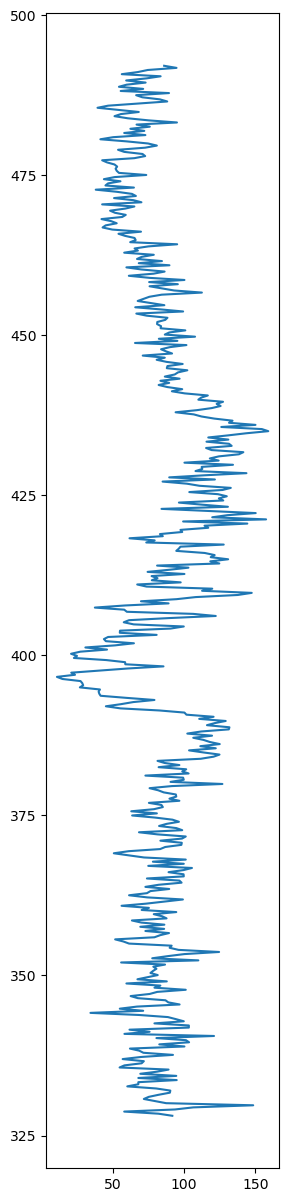

In [130]:
plt.figure(figsize=(3,15))
#accesssing the depth parameter

# depth = data_las.depth_ft #first method
# deoht = data_las['DEPT'] #second method
# depth = data_las.curves['DEPT'] #third method


plt.plot(data_las['GR'], data_las.depth_ft)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


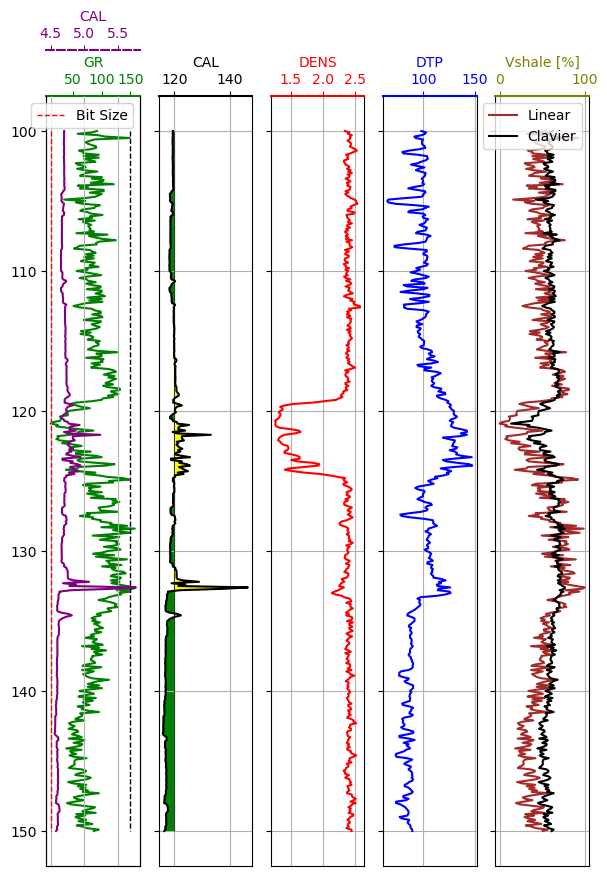

In [131]:
#create am actual well log plot

def customize_x_axis(axis, user_color = 'black', labelText = " ", spine_pos = 1.0):
    axis.grid()
    axis.xaxis.set_label_position('top')
    axis.set_xlabel(labelText, color = user_color)
    axis.tick_params(axis = 'x', top = True, bottom = False,
                          labeltop = True, labelbottom = False, color  = user_color, labelcolor = user_color)
    axis.spines.top.set_color(user_color)
    axis.spines.top.set_linewidth(1.5)
    axis.spines.top.set_position(('axes', spine_pos))





fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(7,10), sharey=True)
list_to_plot = ['GR', 'CAL', 'DENS', 'DTP']
color_list = ['green', 'black', 'red', 'blue']

for var in list_to_plot:
    index = list_to_plot.index(var)
    c = color_list[index]
    ax[index].plot(data_las[var], data_las.depth_m, color = c, lw=1.5) #lw = line width (px), ls = line style
    customize_x_axis(ax[index], c, var)


#To add volume of shale curve to the plots without chagign the list_to_plot.
#we use the linear shale index equation

#v_shale = (gr - min_gr) / (max_gr - min_gr)

min_gr = data_las['GR'].min()
max_gr = data_las['GR'].max()
mean_gr = data_las['GR'].mean()

data_las['vshale'] = (data_las['GR'] - min_gr)/(max_gr - min_gr)
data_las['vshale'] = data_las['vshale']*100
#add a different vsshale calculation approach (clavier equation)
import math
import numpy as np

data_las['vshale clav'] = 1.7 - np.sqrt(3.38 - (data_las['vshale'] + 0.7 )**0.2)
data_las['vshale clav'] = data_las['vshale clav']*100
ax[4].plot(data_las['vshale'], data_las.depth_m, color = 'brown', label = 'Linear')
ax[4].plot(data_las['vshale clav'], data_las.depth_m, color = 'k', label = 'Clavier')
customize_x_axis(ax[4], 'olive', 'Vshale [%]')
ax[4].legend(loc = 'best')

#Add Cliper to GR Log
cal_at_gr = ax[0].twiny() #(copy the characters of the gamma ray track) - this allows the graphs ot share the same y-axis
cal_at_gr.plot(data_las['CAL']/25.4, data_las.depth_m, color = 'purple', lw = 1.5)
cal_at_gr.spines.top.set_linestyle("dashed")
#we can include the bit side onthe caliper lod plot. The bit size is a fixed value sown in the log hearder.
#create a bit size line using vline...this creates a vertical lline and hline is used to create an horizontal line.
cal_at_gr.vlines(4.5, data_las.depth_m.min(), data_las.depth_m.max(), color = 'red', ls = 'dashed', lw = 1.0, label = 'Bit Size')
#create a shale base line in the gamma ray plot.
ax[0].vlines(150, data_las.depth_m.min(), data_las.depth_m.max(), color='black', lw = 1.0, ls='dashed')
ax[0].legend()
cal_at_gr.legend()
customize_x_axis(ax[0], 'green', 'GR')
customize_x_axis(cal_at_gr, 'purple', 'CAL', 1.06)

#creating a viline and coloring the oppsite side of the line
ax[1].vlines(120, data_las.depth_m.min(), data_las.depth_m.max(), color='black', lw = 0.5)
ax[1].fill_betweenx(data_las.depth_m, data_las['CAL'], 120, color = 'yellow', where = data_las['CAL']>120)
ax[1].fill_betweenx(data_las.depth_m, data_las['CAL'], 120, color = 'green', where = data_las['CAL']<120)


ax[0].invert_yaxis() #This is used to invert the Y-axis sinec it is depth rather than height.
fig.savefig('Simplelogfile.png')

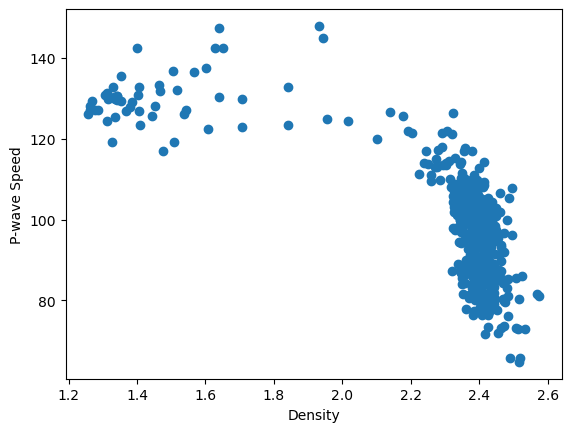

In [132]:
#creating a crossplot wiht the Density and Sonic log plot
import matplotlib.pyplot as plt2
plt2.scatter(data_las['DENS'], data_las['DTP'])
plt2.xlabel('Density')
plt2.ylabel('P-wave Speed')
plt2.show()

#lower densities imply higehr p-waves and vice versa